In [1]:
import pandas as pd
import numpy as np
import dave_pipelib as dp
from plotnine import *
from collections import Counter

In [2]:
fcts = pd.read_csv('RCRA_FACILITIES.csv')
vios = pd.read_csv('RCRA_VIOLATIONS.csv')

In [3]:
fcts.columns

Index(['ID_NUMBER', 'FACILITY_NAME', 'ACTIVITY_LOCATION', 'FULL_ENFORCEMENT',
       'HREPORT_UNIVERSE_RECORD', 'STREET_ADDRESS', 'CITY_NAME', 'STATE_CODE',
       'ZIP_CODE', 'LATITUDE83', 'LONGITUDE83', 'FED_WASTE_GENERATOR',
       'TRANSPORTER', 'ACTIVE_SITE', 'OPERATING_TSDF'],
      dtype='object')

In [4]:
vios.columns

Index(['ID_NUMBER', 'ACTIVITY_LOCATION', 'VIOLATION_TYPE',
       'VIOLATION_TYPE_DESC', 'VIOL_DETERMINED_BY_AGENCY',
       'DATE_VIOLATION_DETERMINED', 'ACTUAL_RTC_DATE',
       'SCHEDULED_COMPLIANCE_DATE'],
      dtype='object')

In [5]:
vios.ID_NUMBER.dtype

dtype('O')

In [6]:
fcts.ID_NUMBER.dtype

dtype('O')

In [7]:
df = pd.merge(vios, fcts, how='left', on='ID_NUMBER')

In [8]:
df.columns

Index(['ID_NUMBER', 'ACTIVITY_LOCATION_x', 'VIOLATION_TYPE',
       'VIOLATION_TYPE_DESC', 'VIOL_DETERMINED_BY_AGENCY',
       'DATE_VIOLATION_DETERMINED', 'ACTUAL_RTC_DATE',
       'SCHEDULED_COMPLIANCE_DATE', 'FACILITY_NAME', 'ACTIVITY_LOCATION_y',
       'FULL_ENFORCEMENT', 'HREPORT_UNIVERSE_RECORD', 'STREET_ADDRESS',
       'CITY_NAME', 'STATE_CODE', 'ZIP_CODE', 'LATITUDE83', 'LONGITUDE83',
       'FED_WASTE_GENERATOR', 'TRANSPORTER', 'ACTIVE_SITE', 'OPERATING_TSDF'],
      dtype='object')

In [9]:
violations = df.groupby('VIOLATION_TYPE_DESC').ID_NUMBER.count()

In [10]:
violations.sort_values(ascending=False).head(25)

VIOLATION_TYPE_DESC
Standards Applicable to Generators of HW: General                                                          160787
Standards Applicable to Generators of HW: Pre-Transport Requirements                                       100711
State Statutory or Regulatory requirements that are broader-in-scope than the federal RCRA requirements     43922
Standards Applicable to Generators of HW: Recordkeeping and Reporting                                       32097
Standards for Used Oil Generators                                                                           26962
Standards Applicable to Generators of HW: Manifest                                                          25301
Land Disposal Restrictions: General                                                                         24594
Standards for Owners and Operators of HW TSDs: General                                                      20483
Standards for Universal Waste Management: Standards for Small Quanti

In [11]:
vbyagency = df.groupby('VIOL_DETERMINED_BY_AGENCY').ID_NUMBER.count()
vbyagency

VIOL_DETERMINED_BY_AGENCY
E       51734
S      542646
Name: ID_NUMBER, dtype: int64

In [12]:
vbycity = df.groupby('CITY_NAME').ID_NUMBER.count()

In [13]:
sorted_cities = vbycity.sort_values(ascending=False)

In [14]:
top200cities = sorted_cities.head(200)

In [15]:
top200cities.sum()

217379

In [16]:
sorted_cities.shape

(10558,)

~50% of violations happen in 200 cities. 10,558 cities overall

In [17]:
df.isnull().sum()

ID_NUMBER                         0
ACTIVITY_LOCATION_x               0
VIOLATION_TYPE                    0
VIOLATION_TYPE_DESC               0
VIOL_DETERMINED_BY_AGENCY         0
DATE_VIOLATION_DETERMINED         0
ACTUAL_RTC_DATE               12878
SCHEDULED_COMPLIANCE_DATE    345626
FACILITY_NAME                     2
ACTIVITY_LOCATION_y               0
FULL_ENFORCEMENT                  0
HREPORT_UNIVERSE_RECORD          10
STREET_ADDRESS                   66
CITY_NAME                        69
STATE_CODE                        0
ZIP_CODE                         73
LATITUDE83                   139644
LONGITUDE83                  139644
FED_WASTE_GENERATOR            3486
TRANSPORTER                      73
ACTIVE_SITE                       0
OPERATING_TSDF                    0
dtype: int64

In [18]:
df.DATE_VIOLATION_DETERMINED.head(1)

0    09/10/1981
Name: DATE_VIOLATION_DETERMINED, dtype: object

In [19]:
df[['M','D','Y']] = df['DATE_VIOLATION_DETERMINED'].str.split('/', expand=True)

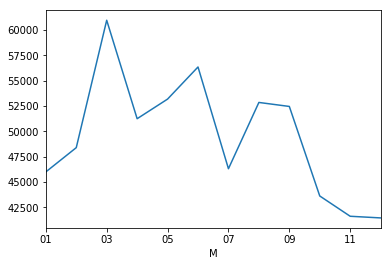

In [20]:
df.groupby('M').ID_NUMBER.count().plot()

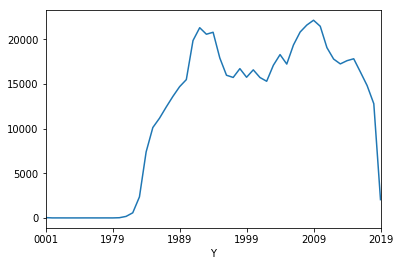

In [21]:
df.groupby('Y').ID_NUMBER.count().plot()

In [22]:
df['VIOLATION_TYPE'] = df['VIOLATION_TYPE'].astype('category')

In [23]:
df['M'] = df['M'].astype('category')

In [24]:
df['Y'] = df['Y'].astype(int)

In [25]:
df.Y.dtype

dtype('int64')

In [26]:
df['Y'] = df['Y'].apply(lambda x: x + 2000 if x <= 19 else x)

In [27]:
df['Y'] = df['Y'].apply(lambda x: x + 100 if x <= 1919 else x)

In [28]:
df['Y'] = df['Y'].apply(lambda x: x + 50 if x == 1943 else x)

In [29]:
np.sort(df.Y.unique())

array([1971, 1974, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

example of how ive been cleaning dates below:

In [30]:
df[df['Y'] == 1971]

,ID_NUMBER,ACTIVITY_LOCATION_x,VIOLATION_TYPE,VIOLATION_TYPE_DESC,VIOL_DETERMINED_BY_AGENCY,DATE_VIOLATION_DETERMINED,ACTUAL_RTC_DATE,SCHEDULED_COMPLIANCE_DATE,FACILITY_NAME,ACTIVITY_LOCATION_y,...,ZIP_CODE,LATITUDE83,LONGITUDE83,FED_WASTE_GENERATOR,TRANSPORTER,ACTIVE_SITE,OPERATING_TSDF,M,D,Y
321067,NJD040749756,NJ,262.A,Standards Applicable to Generators of HW: General,S,06/11/1971,08/01/1991,07/11/1991,RIVERDALE QUARRY CO,NJ,...,07457,40.998054,-74.307919,N,N,-----,------,06,11,1971


In [31]:
df['Y'] = df['Y'].apply(lambda x: x + 20 if x ==1971 else x)

In [32]:
df.Y.unique()

array([1981, 1984, 1987, 1993, 1994, 2000, 1991, 1997, 1992, 2015, 1989,
       1998, 1988, 1995, 1999, 1996, 2001, 2009, 2002, 1990, 1986, 2012,
       1985, 2016, 1983, 2006, 1980, 1982, 2007, 2004, 2008, 2005, 2003,
       2011, 2014, 2013, 2010, 2017, 2018, 2019, 1974, 1979])

In [33]:
df['Y'] = df.Y.apply(lambda x: x + 20 if x == 1974 else x)

In [34]:
df.Y.min()

1979

In [35]:
df['Y'] = df.Y.apply(lambda x: 1997 if x == 1979 else x)

In [36]:
df.Y.min()

1980

In [37]:
df[df.Y == 1980]

,ID_NUMBER,ACTIVITY_LOCATION_x,VIOLATION_TYPE,VIOLATION_TYPE_DESC,VIOL_DETERMINED_BY_AGENCY,DATE_VIOLATION_DETERMINED,ACTUAL_RTC_DATE,SCHEDULED_COMPLIANCE_DATE,FACILITY_NAME,ACTIVITY_LOCATION_y,...,ZIP_CODE,LATITUDE83,LONGITUDE83,FED_WASTE_GENERATOR,TRANSPORTER,ACTIVE_SITE,OPERATING_TSDF,M,D,Y
872,CT5000001941,CT,262.A,Standards Applicable to Generators of HW: General,S,06/25/1980,04/20/1995,07/05/1980,B & R MFG CO INC,CT,...,06716,41.569438,-72.987484,N,N,-----,------,06,25,1980
26778,MND006252589,MN,264.B,Standards for Owners and Operators of HW TSDs:...,S,12/16/1980,03/19/1984,03/20/1981,BODYCOTE THERMAL PROCESSING MINNEAPOLIS,MN,...,55414,44.991524,-93.242039,3,N,H----,------,12,16,1980
59903,COD076455955,CO,262.A,Standards Applicable to Generators of HW: General,E,12/10/1980,03/29/1981,04/11/1981,TOSCO CORP ROCKY FLATS RESEARCH CENTER,CO,...,80401,39.871254,-105.260476,N,N,-----,------,12,10,1980
190822,NYD058281304,NY,262.B,Standards Applicable to Generators of HW: Mani...,E,12/18/1980,08/27/1981,08/27/1981,BERG CHEMICAL CO INC,NY,...,10454,40.798516,-73.910807,N,N,-----,------,12,18,1980
209168,COD048126726,CO,264.A,Standards for Owners and Operators of HW TSDs:...,E,12/31/1980,11/10/1981,NaN,EAGLE PICHER TECHNOLOGIES LLC,CO,...,80911,38.780687,-104.739006,N,N,--A--,------,12,31,1980
212754,OHD020273819,OH,264.B,Standards for Owners and Operators of HW TSDs:...,S,12/02/1980,01/28/1981,NaN,VICKERY ENVIRONMENTAL INC,OH,...,43464,41.370750,-82.955888,1,N,HPA--,---ST-,12,02,1980
227342,COD007057961,CO,264.A,Standards for Owners and Operators of HW TSDs:...,E,12/16/1980,10/03/1981,NaN,EVRAZ ROCKY MOUNTAIN STEEL,CO,...,81004,38.254167,-104.575000,1,N,HPA--,------,12,16,1980
245843,COD000818146,CO,264.A,Standards for Owners and Operators of HW TSDs:...,E,08/15/1980,08/14/1984,09/15/1980,AERRCO (JEFFERSON COUNTY),CO,...,80005,39.856829,-105.188521,N,N,-----,------,08,15,1980
246116,COD048126726,CO,264.A,Standards for Owners and Operators of HW TSDs:...,E,12/31/1980,11/10/1981,11/24/1981,EAGLE PICHER TECHNOLOGIES LLC,CO,...,80911,38.780687,-104.739006,N,N,--A--,------,12,31,1980
286903,OHD020273819,OH,262.B,Standards Applicable to Generators of HW: Mani...,S,12/02/1980,01/28/1981,NaN,VICKERY ENVIRONMENTAL INC,OH,...,43464,41.370750,-82.955888,1,N,HPA--,---ST-,12,02,1980


In [38]:
df[['M','D','Y']] = df['DATE_VIOLATION_DETERMINED'].str.split('/', expand=True)

df[['v_cat', 'v_subtype']] = df['VIOLATION_TYPE'].str.split('.', expand=True)

map for character violation categories:
FEA = 100
XXS = 101
FFS = 102
PCR = 103

In [39]:
df['v_cat'] = np.where(df['v_cat'] == 'FEA', 100, df['v_cat'])

In [40]:
df['v_cat'] = df.v_cat.apply(lambda x: 101 if x == 'XXS' else x)

In [54]:
df['v_cat'] = df.v_cat.apply(lambda x: 102 if x == 'FSS' else x)

In [42]:
df['v_cat'] = df.v_cat.apply(lambda x: 103 if x == 'PCR' else x)

In [55]:
df['v_cat'] = df.v_cat.apply(pd.to_numeric, errors='ignore')

In [60]:
df['jailtime'] = np.where(np.logical_and(df.v_cat >= 260, df.v_cat <= 265), 1, 0)

In [62]:
df.jailtime.mean()

0.767591439819644